In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
if "../" not in sys.path:
  sys.path.append("../") 
import os
os.chdir("..") 
from envs.data_handler import DataHandler

# Comparison of different mRubis Environments

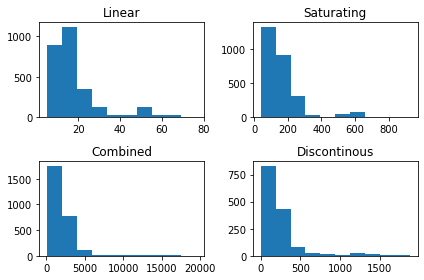

In [2]:
dh_linear = DataHandler(data_generation='Linear').data
dh_saturating = DataHandler(data_generation='Saturating').data
dh_combined = DataHandler(data_generation='Combined').data
dh_discontinous = DataHandler(data_generation='Discontinuous').data

# analyzing historgams
fig = plt.figure()
ax1 = fig.add_subplot(221)
plt.hist(dh_linear['raw'].to_list())
ax1.title.set_text('Linear')
ax2 = fig.add_subplot(222)
plt.hist(dh_saturating['raw'].to_list())
ax2.title.set_text('Saturating')
ax3 = fig.add_subplot(223)
plt.hist(dh_combined['raw'].to_list())
ax3.title.set_text('Combined')
ax4 = fig.add_subplot(224)
plt.hist(dh_discontinous['raw'].to_list())
ax4.title.set_text('Discontinous')
plt.tight_layout()
plt.savefig('data_analysis/main_data_comparison.pdf') 
plt.show()

# Linear Environment

In [4]:
dh = DataHandler(data_generation='Linear')
total = len(dh.data.index)
groups = dh.data.groupby([dh.data.columns[0], dh.data.columns[1]]).ngroups

print('We have ' + str(groups) + ' unqiue combinations of <component, failure> and at total ' + str(total) + ' data points.')

We have 915 unqiue combinations of <component, failure> and at total 2732 data points.


## Task 1: Plot the distribution 

(array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
         14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
         27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
         40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
         53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
         66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
         79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
         92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
        105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
        118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
        131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
        144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
        157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
        170, 171, 172, 173, 174, 175, 176, 177, 178

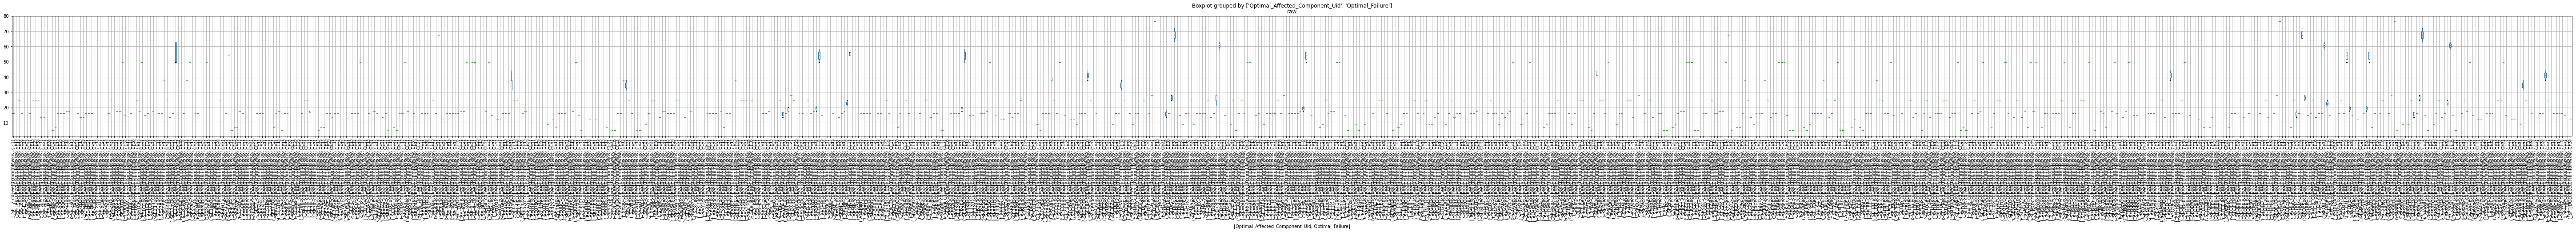

In [3]:
import matplotlib.pyplot as plt
dh.data.boxplot(by=[dh.data.columns[0], dh.data.columns[1]], column=dh.data.columns[1], figsize=(100,5), showfliers=False)
plt.xticks(rotation='vertical')

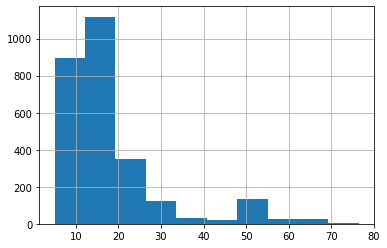

In [4]:
dh.data[dh.data.columns[1]].hist()

## Task 2: Compute statistics

* mean = average of the numbers
* median = separating the higher half from the lower half
* mode = the value that appears most often, it can be multiple values
* std = standard deviation
* skew = skewness, measure of the asymmetry of the probability distribution of a real-valued random variable about its mean
* kurtosis = measure of the "tailedness" of the probability distribution of a real-valued random variable

### Mean

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x126205d60>]],
      dtype=object)

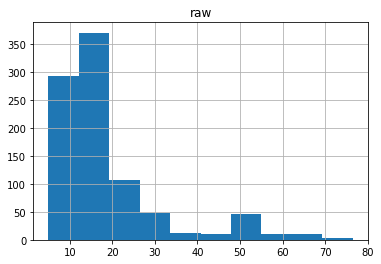

In [6]:
mean_values = dh.data.groupby([dh.data.columns[0], dh.data.columns[1]]).agg('mean')
mean_values.hist()

In [23]:
# get the outliers
mean_group = mean_values.apply(lambda x: x)
mean_group[mean_group.raw > 40]

,,raw
Optimal_Affected_Component_Uid,Optimal_Failure,
_SE-zOOcdEeet0YmmfbMwkw,CF1,58.50
_SE0bTOcdEeet0YmmfbMwkw,CF3,49.50
_SE1CCecdEeet0YmmfbMwkw,CF3,49.50
_SE23oOcdEeet0YmmfbMwkw,CF1,56.25
_SE2Qd-cdEeet0YmmfbMwkw,CF1,49.50
...,...,...
_SFS9vOcdEeet0YmmfbMwkw,CF3,60.75
_SFSVCecdEeet0YmmfbMwkw,CF3,49.50
_SFSVkucdEeet0YmmfbMwkw,CF3,44.10


### Median

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x126868340>]],
      dtype=object)

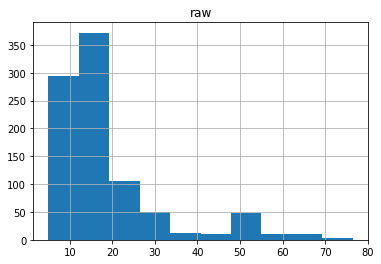

In [8]:
median = dh.data.groupby([dh.data.columns[0], dh.data.columns[1]]).agg('median')
median.hist()

In [25]:
# get the outliers
group = median.apply(lambda x: x)
group[group.raw > 40]

,,raw
Optimal_Affected_Component_Uid,Optimal_Failure,
_SE-zOOcdEeet0YmmfbMwkw,CF1,58.50
_SE0bTOcdEeet0YmmfbMwkw,CF3,49.50
_SE1CCecdEeet0YmmfbMwkw,CF3,49.50
_SE23oOcdEeet0YmmfbMwkw,CF1,56.25
_SE2Qd-cdEeet0YmmfbMwkw,CF1,49.50
...,...,...
_SFS9vOcdEeet0YmmfbMwkw,CF3,60.75
_SFSVCecdEeet0YmmfbMwkw,CF3,49.50
_SFSVkucdEeet0YmmfbMwkw,CF3,44.10


### Mode

(array([294., 376., 113.,  56.,  15.,  11.,  49.,  14.,  14.,   6.]),
 array([ 5.  , 12.15, 19.3 , 26.45, 33.6 , 40.75, 47.9 , 55.05, 62.2 ,
        69.35, 76.5 ]),
 <a list of 10 Patch objects>)

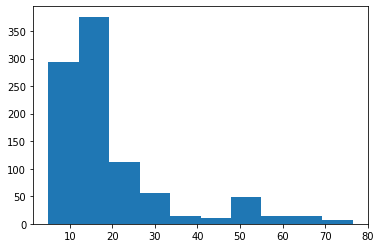

In [10]:
import operator
import functools

mode = dh.data.groupby([dh.data.columns[0], dh.data.columns[1]]).agg(pd.Series.mode)
mode_values = mode[dh.data.columns[2]].values
mode_flatten = np.hstack(mode_values).tolist()

plt.hist(mode_flatten)

In [24]:
# get the outliers
mode_group = mode.apply(lambda x: x)
high_values = []
for index, row in mode_group.iterrows():
    if isinstance(row['raw'], np.ndarray):
        for value in row['raw']:
            if value >= 40:
                high_values.append([str(index), value])
    else:
        if row['raw'] >= 40:
            high_values.append([str(index), row['raw']])

print('Outliers:')
for value in high_values:
    print(value)

Outliers:
["('_SE-zOOcdEeet0YmmfbMwkw', 'CF1')", 58.5]
["('_SE0bTOcdEeet0YmmfbMwkw', 'CF3')", 49.5]
["('_SE1CCecdEeet0YmmfbMwkw', 'CF3')", 49.5]
["('_SE23oOcdEeet0YmmfbMwkw', 'CF1')", 49.5]
["('_SE23oOcdEeet0YmmfbMwkw', 'CF1')", 63.0]
["('_SE2Qd-cdEeet0YmmfbMwkw', 'CF1')", 49.5]
["('_SE3ehucdEeet0YmmfbMwkw', 'CF1')", 49.5]
["('_SE4FWecdEeet0YmmfbMwkw', 'CF2')", 54.0]
["('_SE57RecdEeet0YmmfbMwkw', 'CF3')", 58.5]
["('_SE8-O-cdEeet0YmmfbMwkw', 'CF1')", 49.5]
["('_SE8Xm-cdEeet0YmmfbMwkw', 'CF1')", 49.5]
["('_SE9lfucdEeet0YmmfbMwkw', 'CF1')", 67.5]
["('_SE_aXOcdEeet0YmmfbMwkw', 'CF2')", 49.5]
["('_SE_a_OcdEeet0YmmfbMwkw', 'CF1')", 49.5]
["('_SE_a_OcdEeet0YmmfbMwkw', 'CF2')", 49.5]
["('_SEtGGecdEeet0YmmfbMwkw', 'CF3')", 49.5]
["('_SEu7oecdEeet0YmmfbMwkw', 'CF1')", 63.0]
["('_SEuUQucdEeet0YmmfbMwkw', 'CF3')", 44.1]
["('_SEuUWecdEeet0YmmfbMwkw', 'CF3')", 49.5]
["('_SEviuucdEeet0YmmfbMwkw', 'CF2')", 63.0]
["('_SEwwu-cdEeet0YmmfbMwkw', 'CF1')", 58.5]
["('_SEx-lecdEeet0YmmfbMwkw', 'CF1')", 63.0]


### standard deviation

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12695b820>]],
      dtype=object)

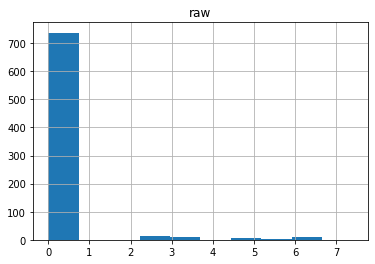

In [12]:
std = untransformed_data.groupby([dh.data.columns[0], dh.data.columns[1]]).agg('std')
std.hist()

In [20]:
# get the outliers
std_group = std.apply(lambda x: x)
std_group[std_group.raw > 2]

,,raw
Optimal_Affected_Component_Uid,Optimal_Failure,
_SE23oOcdEeet0YmmfbMwkw,CF1,7.394255
_SE7Iq-cdEeet0YmmfbMwkw,CF1,2.250000
_SEu7iucdEeet0YmmfbMwkw,CF3,5.634891
_SEvio-cdEeet0YmmfbMwkw,CF3,4.454773
_SEwwu-cdEeet0YmmfbMwkw,CF1,3.401680
_SEymFucdEeet0YmmfbMwkw,CF3,3.181981
_SEymIOcdEeet0YmmfbMwkw,CF1,5.250000
_SEz0XOcdEeet0YmmfbMwkw,CF3,2.474874
_SEz0XucdEeet0YmmfbMwkw,CF3,6.363961


### skewness
measure of the asymmetry of the probability distribution of a real-valued random variable about its mean

In [5]:
values = dh.data['raw']
values.skew()

1.8350645562903793

In [10]:
# we have positive skewed data
mode = values.mode()
median = values.median()
mean = values.mean()
print(mode, median, mean, (mode < median) & (median < mean))

0    16.0
dtype: float64 16.0 18.24110541727672 0    False
dtype: bool


### kurtosis
measure of the "tailedness" of the probability distribution of a real-valued random variable

In [11]:
kurtosis = dh.data[dh.data.columns[2]].kurt()
kurtosis

3.482033125093173

In [12]:
# having leptokurtical data
exzess = kurtosis - 3
exzess > 0

True

## Result:

* The combination of <Query Service,CF5> shows particular high values
* We have a positive skewness, that increases the probability to get a lower value compared to the average.
* We have leptokurtical data what means that the values are distributed over a small range.